In [1]:
import tensorflow as tf

In [2]:
tf.__version__

'2.5.0'

In [3]:
mnist = tf.keras.datasets.mnist # 28*28 handwritten digits 0 to 9.

In [4]:
(x_train,y_train), (x_test,y_test) = mnist.load_data()

In [5]:
# normalise the data.
x_train = tf.keras.utils.normalize(x_train, axis = 1)
x_test = tf.keras.utils.normalize(x_test, axis = 1)

In [6]:
print(len(x_train))
print(len(y_train))
print(len(x_test))
print(len(y_test))

60000
60000
10000
10000


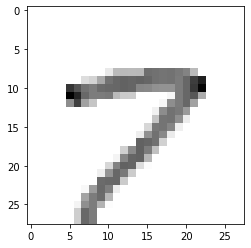

In [7]:
import matplotlib.pyplot as plt

plt.imshow(x_train[123], cmap = plt.cm.binary)
plt.show()

In [8]:
# Define the model.

model = tf.keras.models.Sequential()
model.add(tf.keras.layers.Flatten())
# Hidden layers.
model.add(tf.keras.layers.Dense(128, activation = tf.nn.relu))
model.add(tf.keras.layers.Dense(128, activation = tf.nn.relu))
# Output layer.
model.add(tf.keras.layers.Dense(10, activation = tf.nn.softmax))

# Set the model parameters.
model.compile(optimizer = 'adam' , loss = 'sparse_categorical_crossentropy' , metrics = ['accuracy'])

# Train the model.
model.fit(x_train, y_train, epochs = 3)

Epoch 1/3
1875/1875 [==============================] - 4s 2ms/step - loss: 0.2605 - accuracy: 0.9235
Epoch 2/3
1875/1875 [==============================] - 3s 2ms/step - loss: 0.1065 - accuracy: 0.9670
Epoch 3/3
1875/1875 [==============================] - 3s 2ms/step - loss: 0.0722 - accuracy: 0.9768


In [9]:
# See how good the model does on the test data.
val_loss, val_accuracy = model.evaluate(x_test, y_test)
print(val_loss, val_accuracy)

313/313 [==============================] - 1s 1ms/step - loss: 0.0925 - accuracy: 0.9713
0.09246575832366943 0.9713000059127808


In [10]:
# To save a model.
model.save('epic_num_reader_model')

# To load the model.
new_model = tf.keras.models.load_model('epic_num_reader_model')

# Make predictions with the new model.
predictions = new_model.predict([x_test])

import numpy as np

print(np.argmax(predictions[678]))

INFO:tensorflow:Assets written to: epic_num_reader_model\assets
9


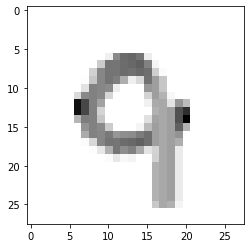

In [11]:
plt.imshow(x_test[678], cmap = plt.cm.binary)
plt.show()